In [1]:
import pickle 
import pprint as pp
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import svm
import matplotlib.pyplot as plt

In [1]:
#This program loads the train and test data sets and runs the baseline OLS regression and runs out of sample testing

In [5]:
#Load Test and Train Data
train = pd.read_csv('../rawdata/Trac_USSC_train.csv', index_col = 0)
test = pd.read_csv('../rawdata/Trac_USSC_test.csv', index_col = 0)

In [24]:
train.head()

,trial,songername,gender,party,demean_logprisonsentmonths,year1,year2,year3,year4,year5,...,judge_race2,judge_race3,judge_race4,judge_race5,judge_party1,judge_party2,judge_party3,judge_party4,judge_party5,age
535532,0,"TEILBORG, JAMES A.",1,0,0.270307,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,68.0
652720,0,"WHALEY, ROBERT H.",1,1,0.112248,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,57.0
442930,0,"REASONER, STEPHEN M.",1,0,1.876450,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,57.0
365546,1,"ROSEN, GERALD ELLIS",1,0,2.383566,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,54.0
36416,0,"DEARIE, RAYMOND J.",1,0,-0.180349,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,55.0


In [20]:
drops = ['songername', 'demean_logprisonsentmonths', 'judge_religion3', 'judge_rating3', 'judge_party1']
for i in range(36):
    drops.append('year' + str(i+1))
for i in range(5):
    drops.append('judge_race' + str(i+1))

In [21]:
X_train = train.drop(drops, axis = 1)
X_train['intercept'] = 1
Y_train = np.array(train['demean_logprisonsentmonths'], dtype=np.float32)
X_test = test.drop(drops, axis = 1)
X_test['intercept'] = 1
Y_test = np.array(test['demean_logprisonsentmonths'], dtype=np.float32)

In [22]:
## base line on Trac_USSC datasets

In [23]:
regr = linear_model.LinearRegression(fit_intercept = False)
regr.fit(X_train, Y_train)
#print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - Y_test) ** 2))

Mean squared error: 4.44


In [ ]:
## gender influence


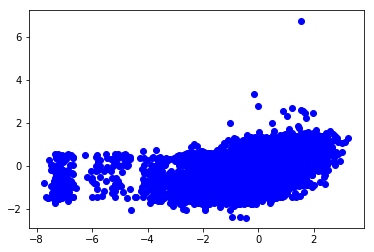

In [16]:
plt.scatter(Y_test, regr.predict(X_test), color='blue')
plt.show()